In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [122]:
def removeZenkakuSpace(df, cols):
    for col in cols:
        df[col] = df[col].str.replace('　', ' ')
    return df

def histEachFavs(df, col, height=5, aspect=4):
    for fav in sorted(df[FAV].unique()):
        sns.catplot(x=col,data=df.query(f"{FAV} == @fav"),kind='count',height=height, aspect=aspect)
        plt.title(f'fav group:{fav}')
        
def getQueries(df, cols):
    assert type(cols) == str or type(cols) == list, 'cols is str or list'
    queries = []
    if type(cols) == str:
        queries = [f'{cols} == {flag}' for flag in sorted(df[cols].unique())]
    elif type(cols) == list:
        for col in cols:
            col_queries = [f'{col} == {flag}' for flag in sorted(df[col].unique())]
            if len(queries) == 0:
                queries = col_queries
            else:
                queries = [f"{q} & {col_queries[0]}" for q in queries] + [f'{q} & {col_queries[1]}' for q in queries]
            
    return queries

def histColumnsFavs(df, cols:list, height=5, aspect=4):
    queries = getQueries(df, cols)
    for query in queries:
        data = df.query(query)
        if len(data) == 0:
            continue
        sns.catplot(x=FAV,data=data,kind='count',height=height, aspect=aspect)
        plt.title(query)

In [4]:
out_dir = '../output'
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')
ID = 'ncode'

# train_df.userid = train_df.userid.astype('str')
# train_df.genre = train_df.genre.astype('str')
# test_df.userid = test_df.userid.astype('str')
# test_df.genre = test_df.genre.astype('str')
FAV = 'fav_novel_cnt_bin'
str_cols = ['title', 'story', 'keyword', 'writer']
for df in [train_df, test_df]:
    removeZenkakuSpace(df, str_cols)

In [5]:
train_df.columns

Index(['ncode', 'general_firstup', 'title', 'story', 'keyword', 'userid',
       'writer', 'biggenre', 'genre', 'novel_type', 'end', 'isstop', 'isr15',
       'isbl', 'isgl', 'iszankoku', 'istensei', 'istenni', 'pc_or_k',
       'fav_novel_cnt_bin'],
      dtype='object')

In [73]:
train_df.isr15.unique()

array([0, 1])

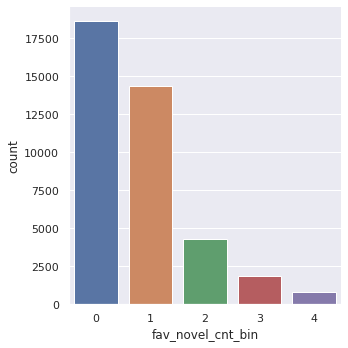

In [6]:
sns.set(font_scale = 1)
sns.catplot(x=FAV,data=train_df,kind="count")

In [7]:
train_df.groupby(FAV).count().reset_index()[ID]

0    18646
1    14363
2     4320
3     1857
4      814
Name: ncode, dtype: int64

In [8]:
train_df.story.str.contains('pixiv').sum()

496

(array([302.,   0., 150.,   0.,   0.,  28.,   0.,   9.,   0.,   7.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

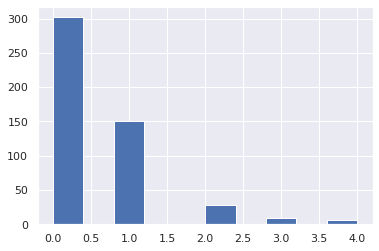

In [9]:
plt.hist(train_df.query("story.str.contains('pixiv')")[FAV],range=(0,4))

(array([11.,  0., 24.,  0.,  0., 37.,  0., 15.,  0.,  7.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

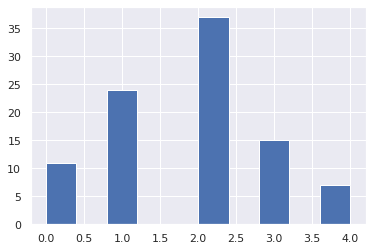

In [10]:
plt.hist(train_df.query("story.str.contains('挿絵')")[FAV],range=(0,4))

In [11]:
pd.options.display.max_colwidth=1000
train_df[(train_df.keyword.str.split(expand=True)[31].notna())]['keyword']

16559          R15 異世界転生 騎士 巫女 婚約破棄 魔法陣 召喚 悪魔？ 白賢者 大神官 魔王 勇者 天使 和風 西洋 中世近世 魔法 神業 出向社長 茶番 ほのぼの オフィス ワーキングホリデー 強盗 牢屋 誘拐 家族 失踪 再会 ハッピーエンド 花言葉・神話な名付け 集英社小説大賞２
38690    R15 残酷な描写あり 異世界転生 オリジナル戦記 男主人公 転生 日本 妖精王 魔法 中世 精霊王 誘拐 拉致 ダーク 魔王 西洋 超魔王 冒険 祝福 美麗人 魔物 妖精 美丈夫 精霊 終焉 ハイエルフ エロフ OVL大賞7M ESN大賞３ キネノベ大賞３ 新人発掘コンテスト 123大賞
Name: keyword, dtype: object

<Figure size 1440x720 with 0 Axes>

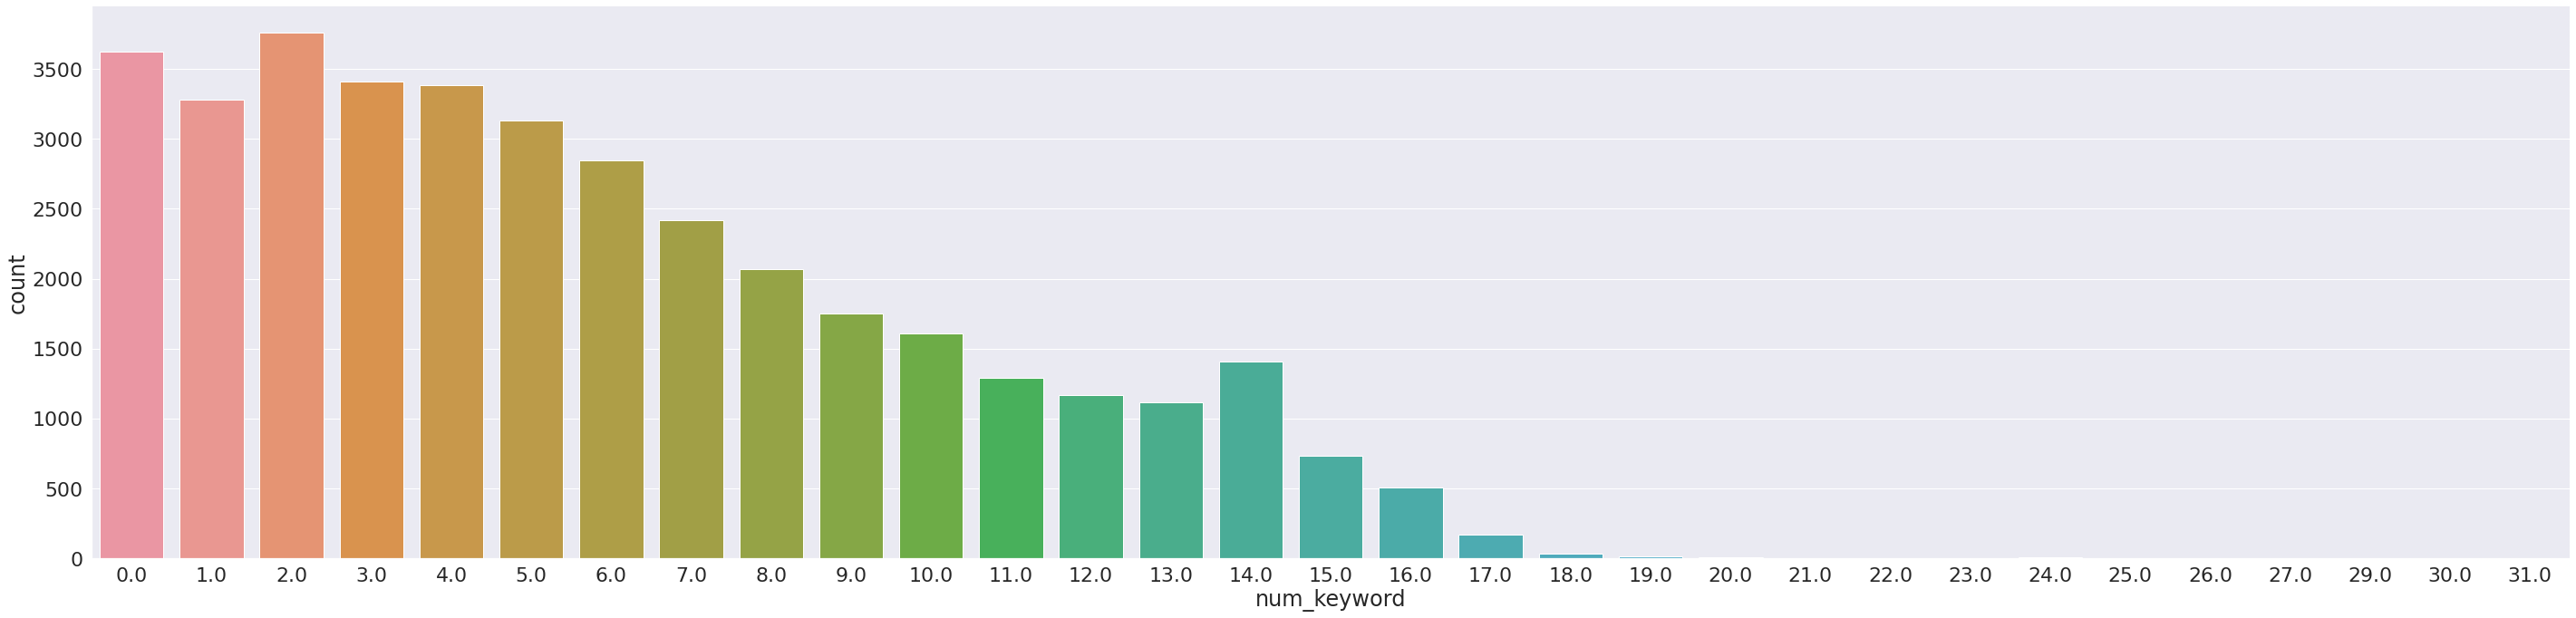

In [12]:
fig = plt.figure(figsize=(20,10 ))
train_df['num_keyword'] = train_df.keyword.str.count(' ')
sns.set(font_scale = 2)
sns.catplot(x='num_keyword',data=train_df,kind='count',height=10, aspect=4)

<Figure size 1440x720 with 0 Axes>

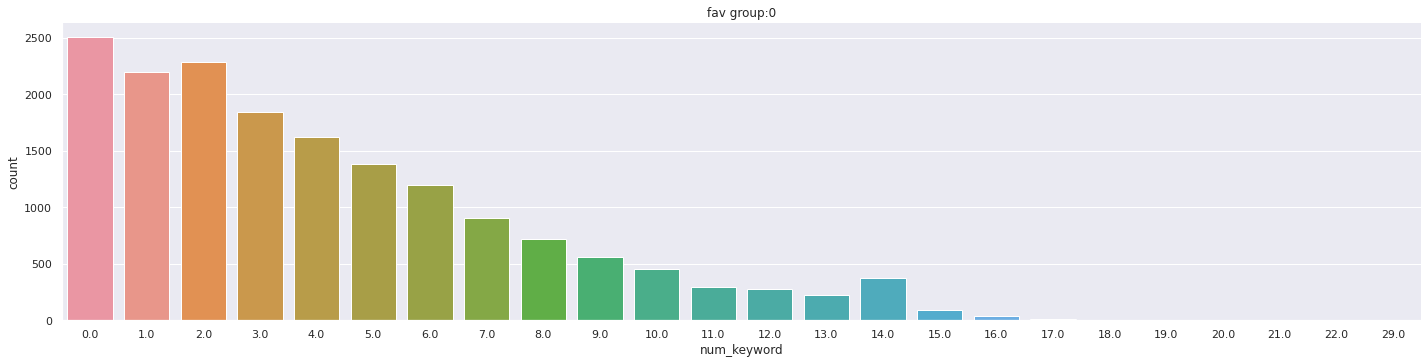

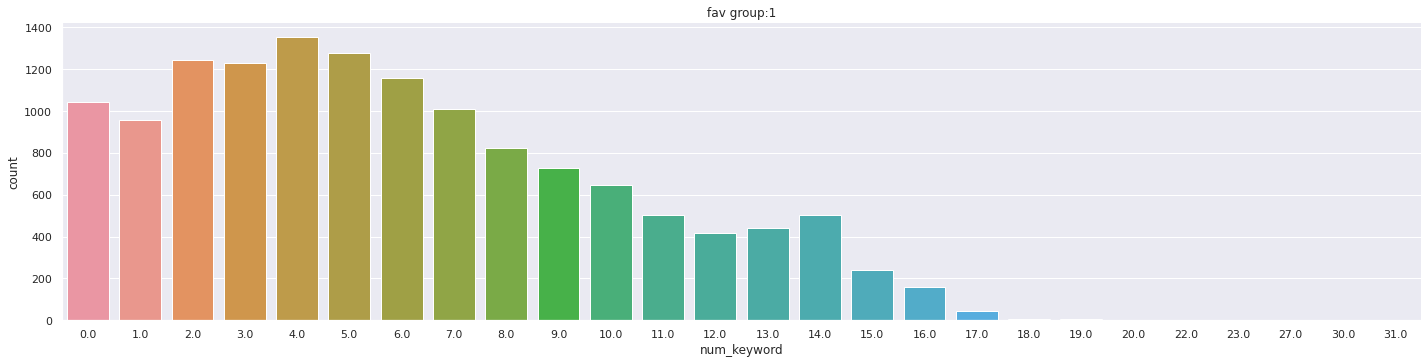

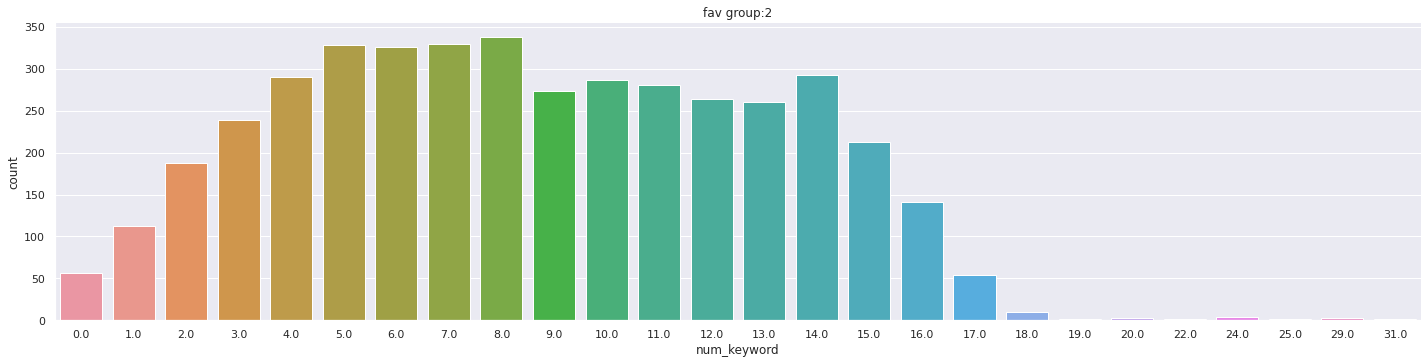

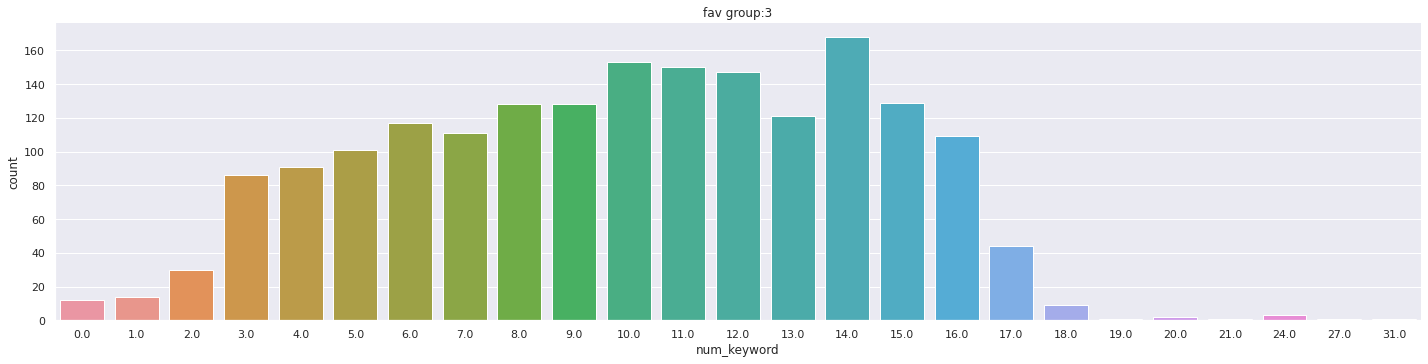

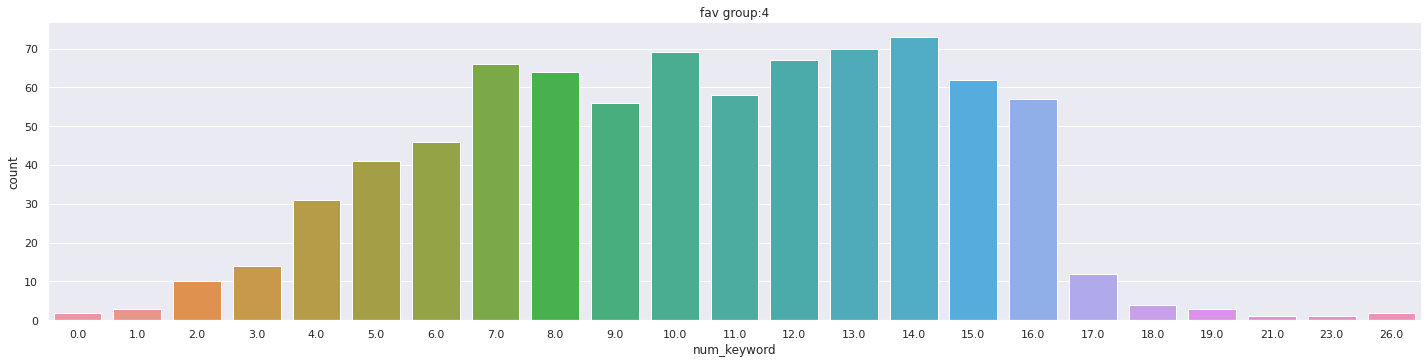

In [123]:
fig = plt.figure(figsize=(20,10 ))
train_df['num_keyword'] = train_df.keyword.str.count(' ')
# sns.set(font_scale = 1)
histEachFavs(train_df, 'num_keyword',height=5)

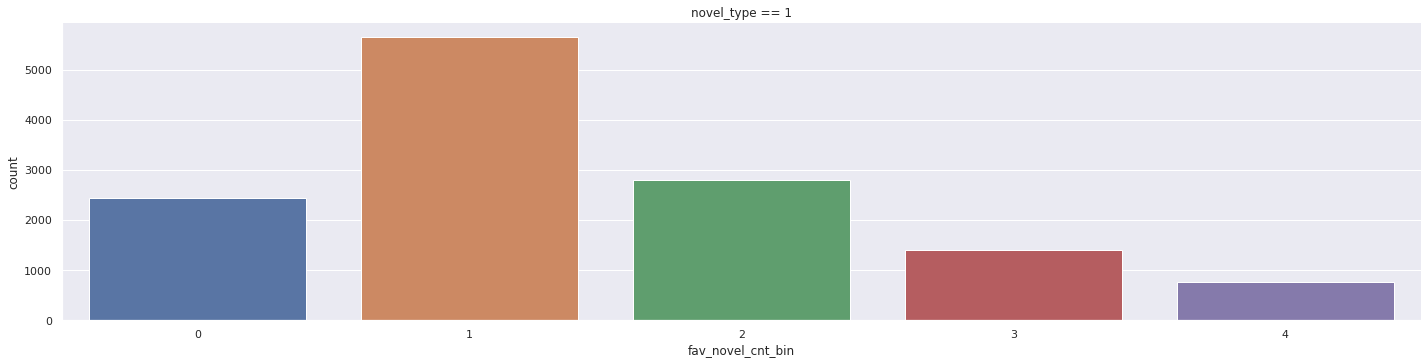

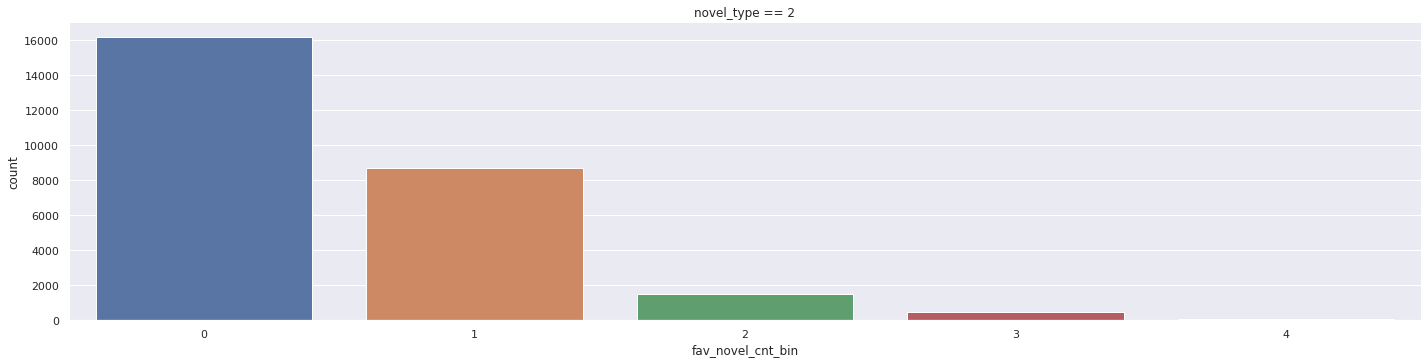

In [111]:
histColumnsFavs(train_df, 'novel_type')

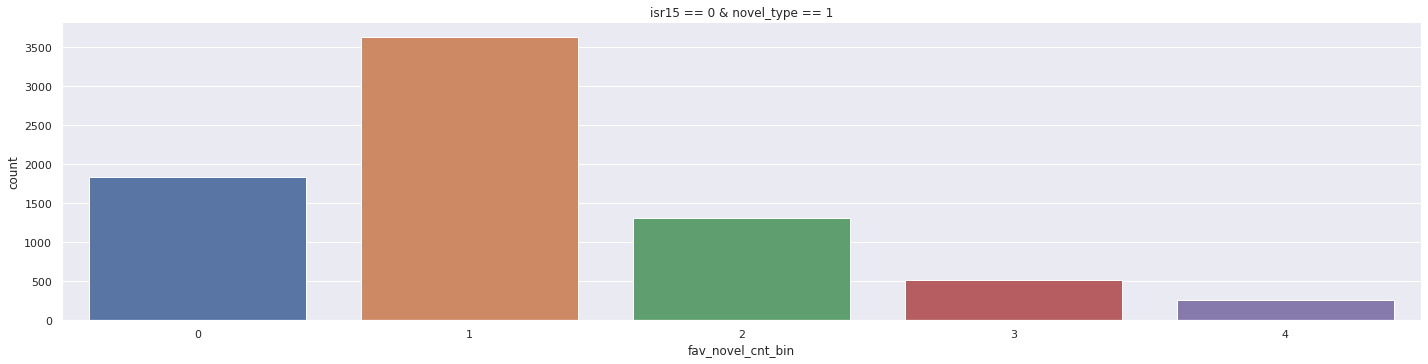

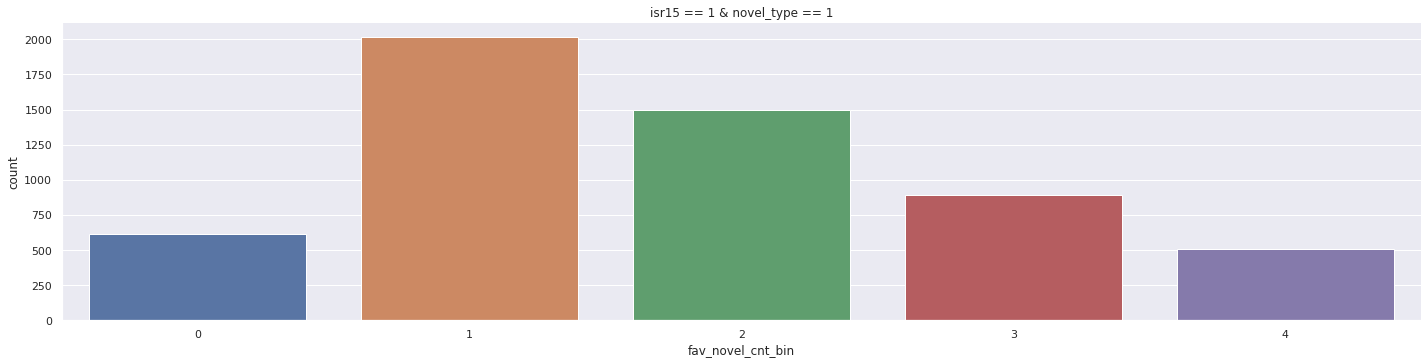

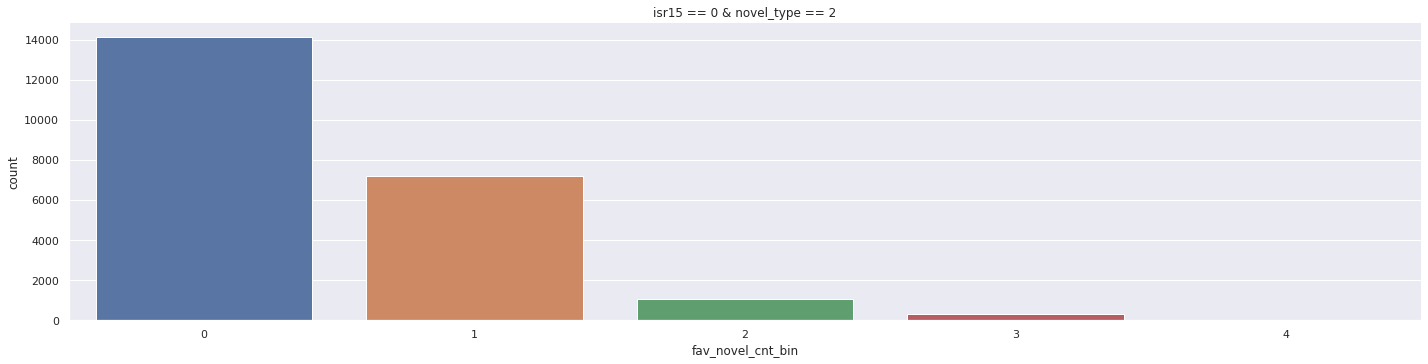

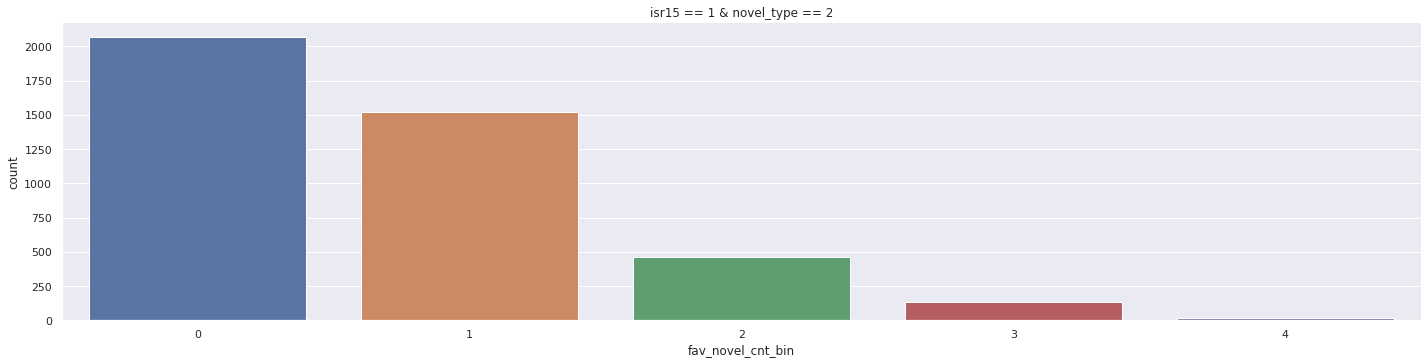

In [109]:
histColumnsFavs(train_df, ['isr15', 'novel_type'])

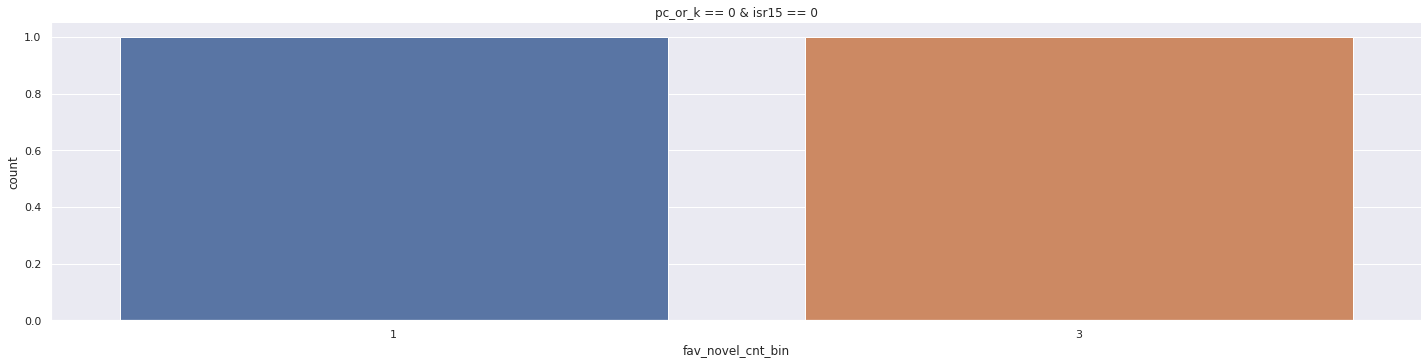

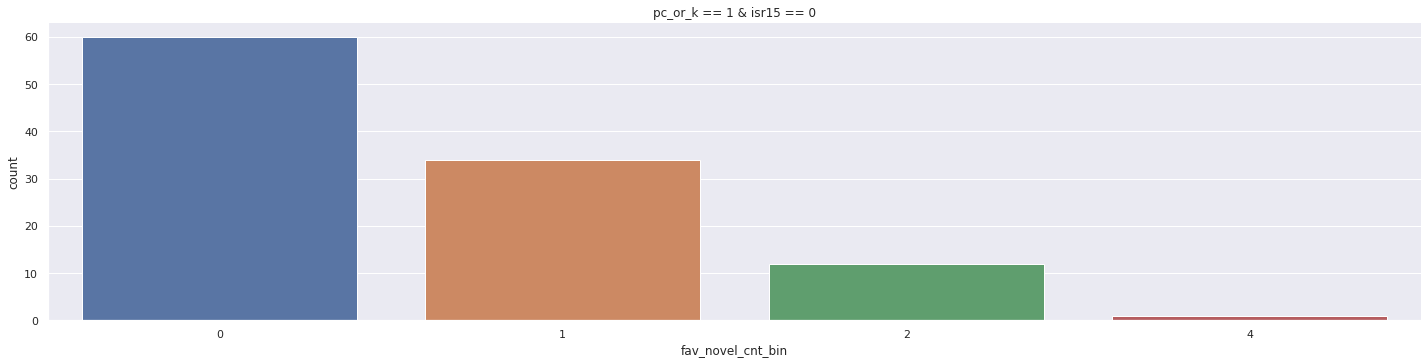

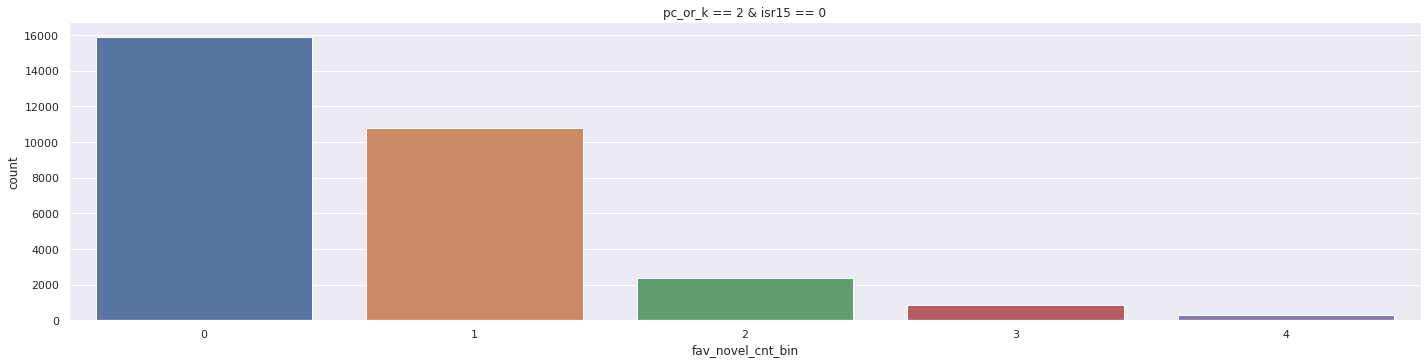

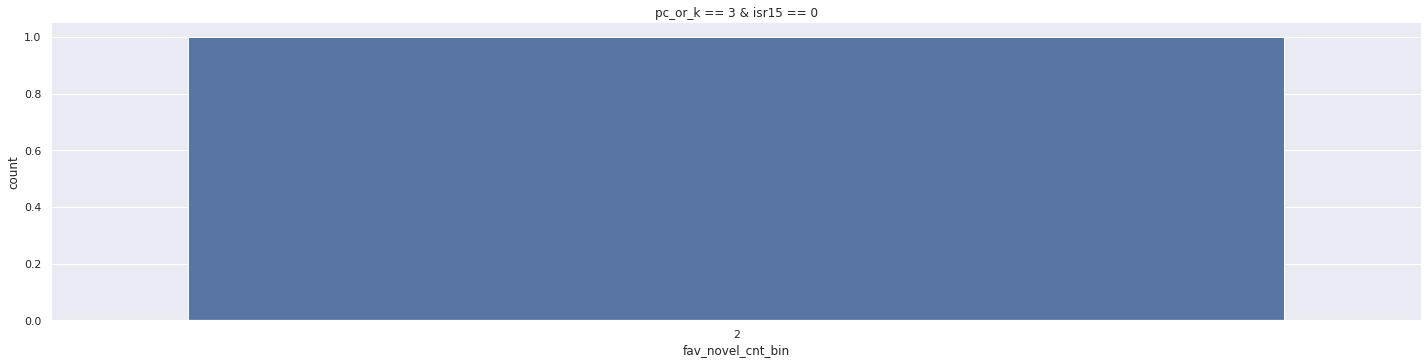

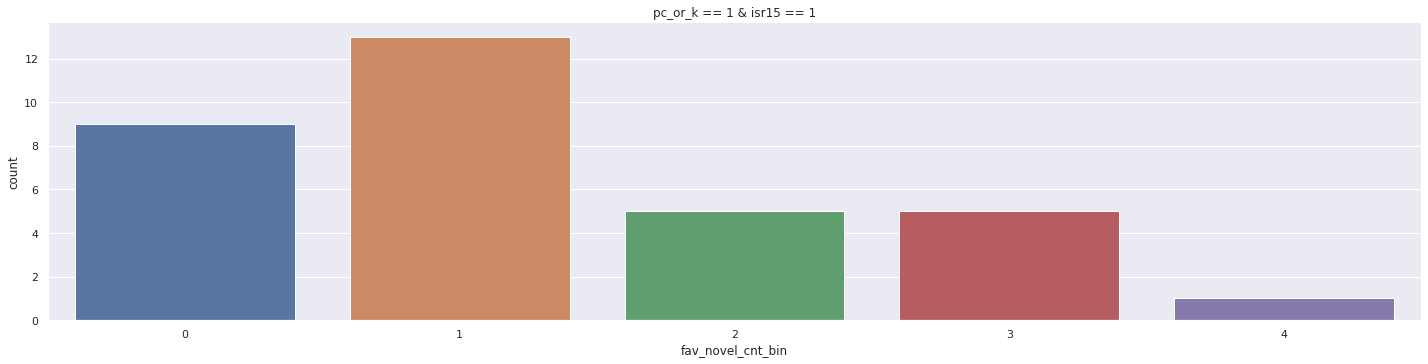

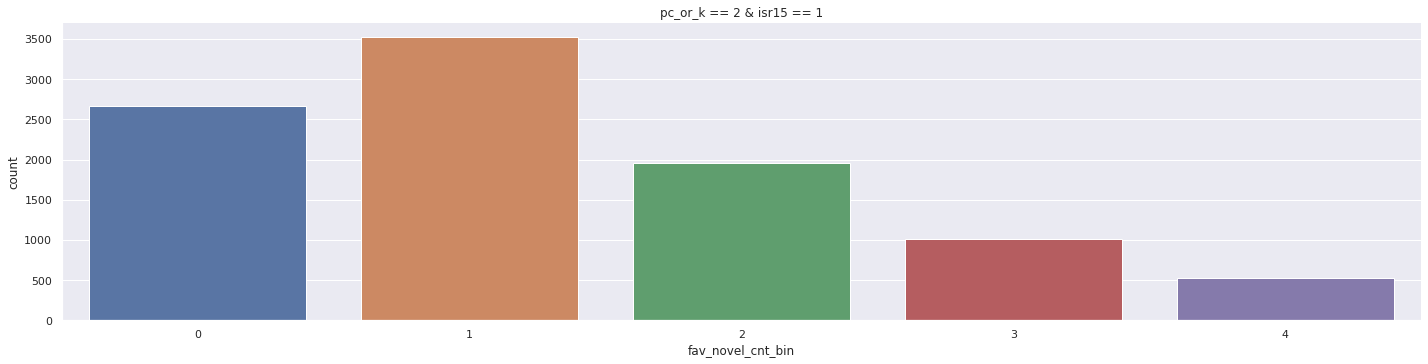

In [118]:
histColumnsFavs(train_df, ['pc_or_k', 'isr15'])

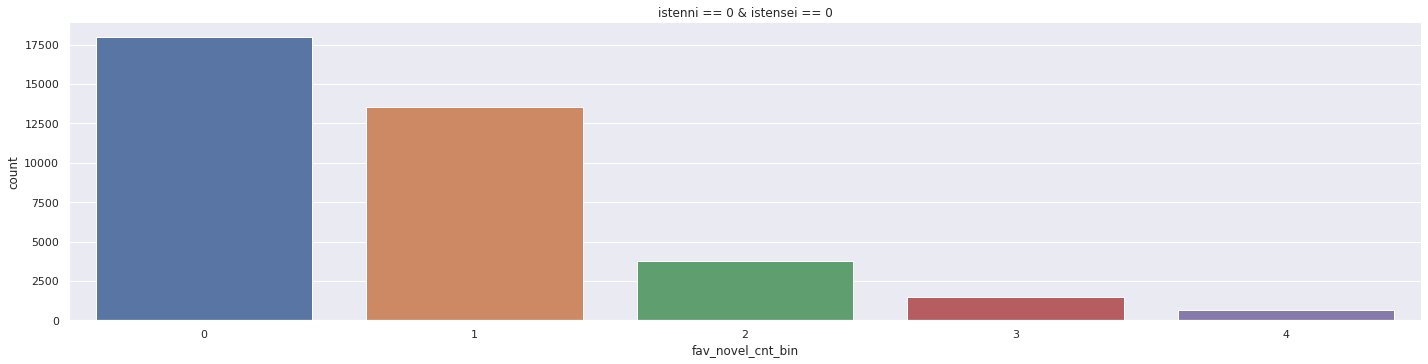

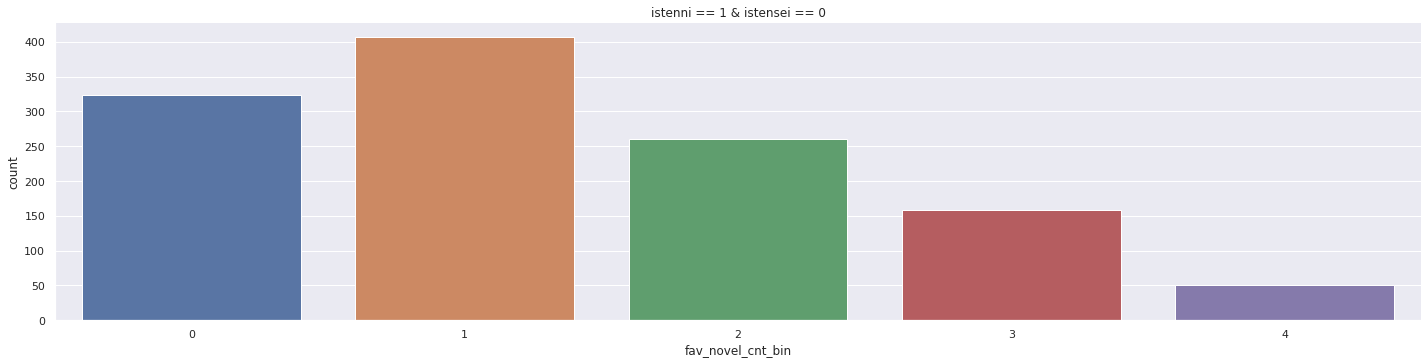

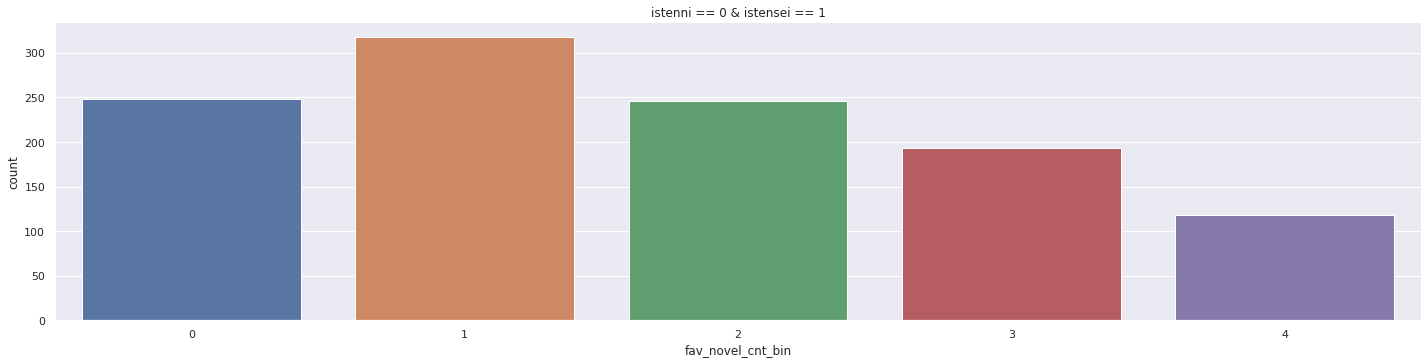

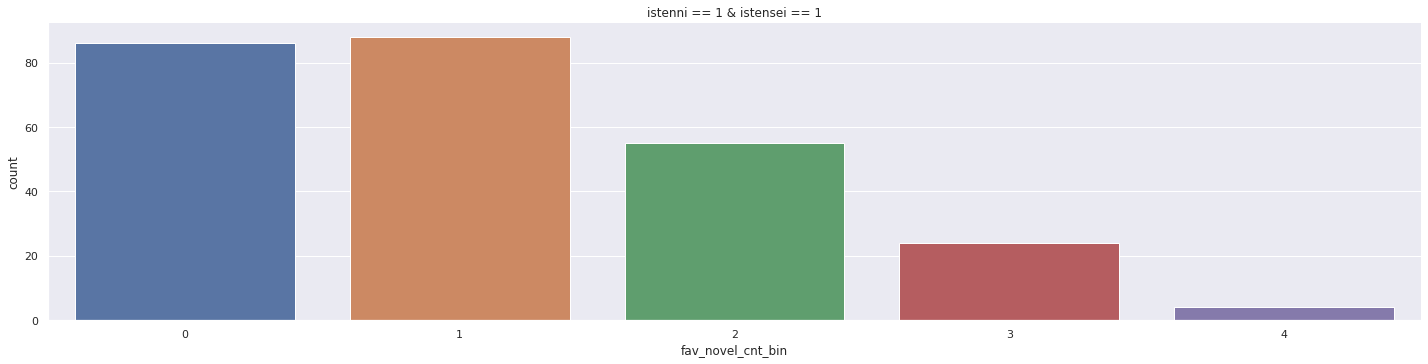

In [127]:
histColumnsFavs(train_df,['istenni', 'istensei'])